# Exploration 2-2

### Breast Cancer Classification

### Table of Contents

1. Data Definition
2. EDA
    - Check missing value
    - Data Distribution
        - 변수 별 데이터 분포 시각화
        - 변수 중요도(Featrue Importances) 시각화
        - 타겟 별 2차원 및 3차원 시각화(2D and 3D plot
    - Outlier Detection 
    - Data Imbalance
    - Correlation
3. Model Training
4. Model Evaluation

### 1. 문제 정의

#### breast cnacer 데이터를 사용해 양성,음성 클래스를 분류하는 예측 모델 구축 

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
breast_cancer_db = load_breast_cancer()

In [3]:
print("유방암 데이터 셋의 키: \n{}".format(breast_cancer_db.keys()))

유방암 데이터 셋의 키: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(breast_cancer_db.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
# 실제 데이터는 data 필드에 저장되어 있음
breast_cancer_data = breast_cancer_db.data

In [6]:
# target 값은 우리가 예측하려는 와인 종류 클래스 번호(0, 1, 2)를 가지고 있다.
breast_cancer_target = breast_cancer_db.target

In [7]:
# feature_names 값은 각 특성을 담고 있는 리스트이다.
feature_names = breast_cancer_db.feature_names

In [8]:
# wine_df라는 데이터 프레임을 생성한다.
breast_cancer_df = pd.DataFrame(breast_cancer_data, columns=feature_names)

In [9]:
# 실제 정답 값을 데이터프레임에 저장 
breast_cancer_df['label'] = breast_cancer_target

In [10]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 2. 데이터 시각화 (EDA)
```
1.결측값 확인
2.데이터 분포 확인
    - 1) 히스토그램을 통해 변수 별 데이터 분포 시각화
    - 2) Lightgbm 모델을 통해 변수 중요도(Featrue Importances) 시각화
    - 3) PCA를 통해 중요도가 가장 높은 특징 2개를 시각화 (타겟 별 2차원 및 3차원 시각화(2D and 3D plot)
3.이상치 탐지 <- StandardScaler 사용
4.데이터 불균형
5.상관관계 확인
    
```

### 2.1 결측값 확인
```
breast_cancer_df.info()를 통해 정보를 확인했을 때 label을 제외한 나머지 
특성이 모두 float64 숫자형 데이터이고, 결측값은 없다
```

In [11]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### 2.2.1 히스토그램을 통해 변수 별 데이터 분포 시각화

- 양성과 악성 두 클래스에 대해 각 특성의 히스토그램을 그려본다
```
특성들의 분포를 히스토그램을 통해 어떤 분포를 가지는지 시각적으로 확인 할 수 있다. 
특성이 30개인 고차원 데이터이기 때문에 어떤 특성이 중요도를 가지는지 시각화할 필요성이 있다.
```

In [12]:
positive = breast_cancer_df[breast_cancer_df['label'] == 1]
negative = breast_cancer_df[breast_cancer_df['label'] == 0] 

In [13]:
positive

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


In [14]:
negative

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


In [15]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
def sns_histplot(feature_names, i, j):
    plt.figure(figsize=(20,20))
    idx = 1
    for feature in feature_names:
        if idx <= (i * j):
            plt.subplot(i, j, idx)
            sns.histplot(positive[feature], color='#3498db', kde=True, alpha=0.7).set(xlabel=None)
            sns.histplot(negative[feature], color='#c0392b', kde=True, alpha=0.7).set(xlabel=None)
            plt.title('histogram of {}'.format(feature))
            plt.legend(['positive', 'negative'])
            idx += 1
        else:
            break
    plt.show()

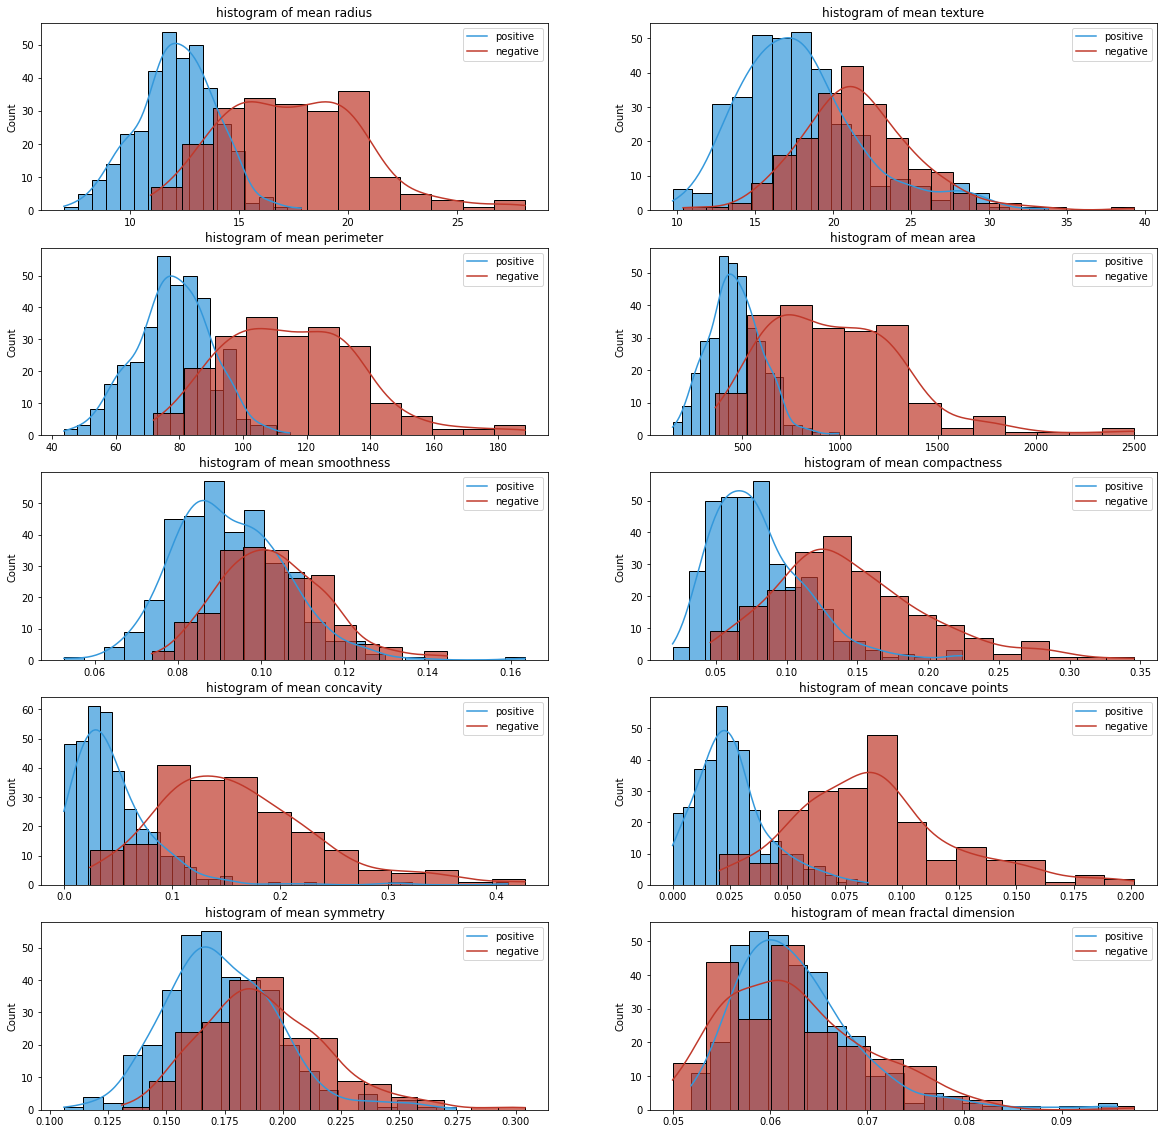

In [17]:
sns_histplot(feature_names[:10], 5, 2)

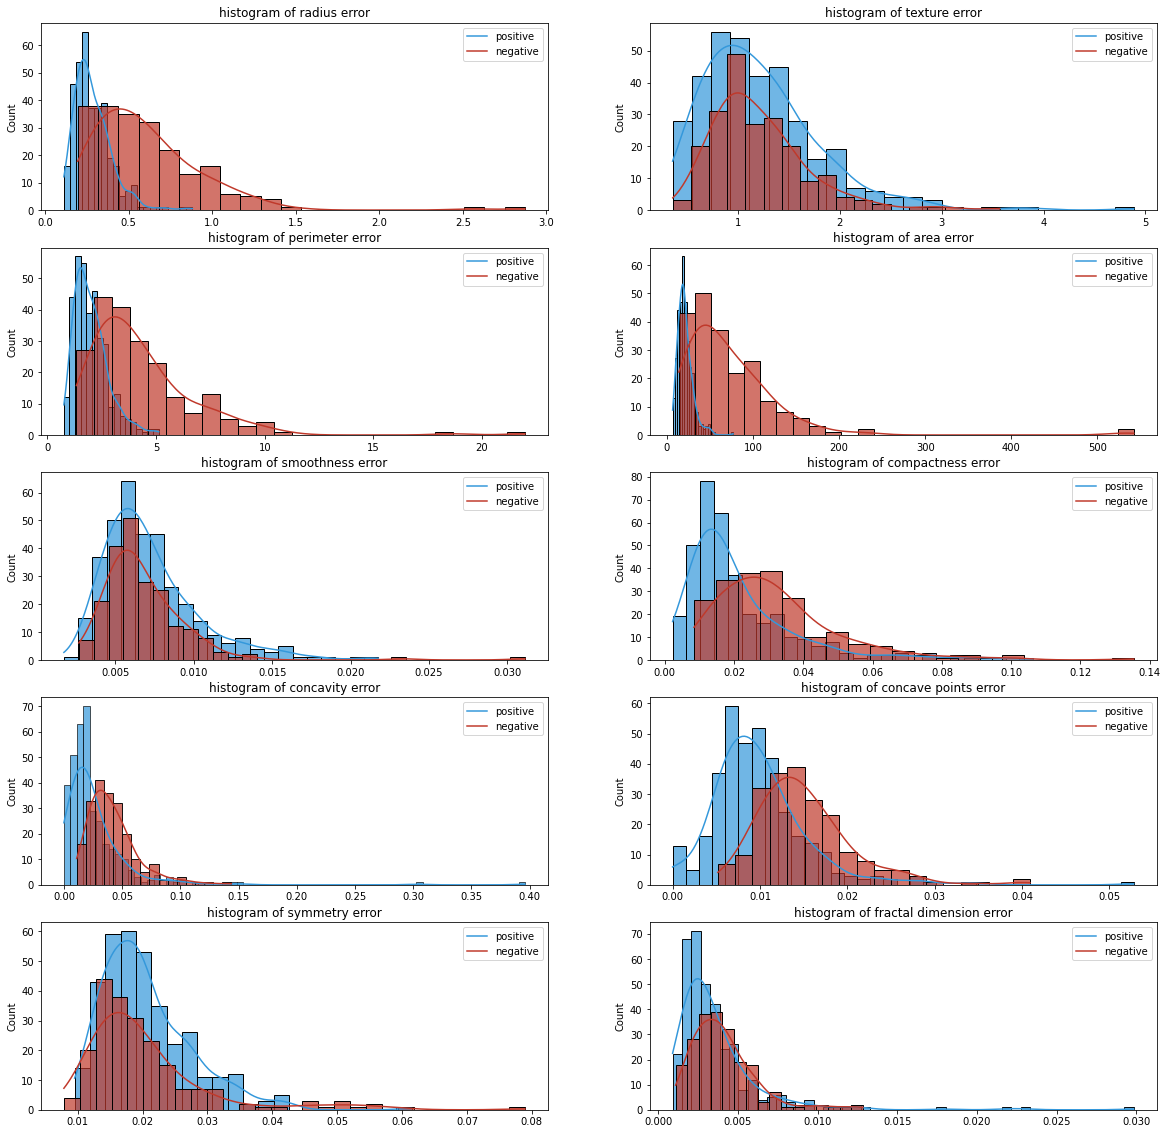

In [18]:
sns_histplot(feature_names[10:20], 5, 2)

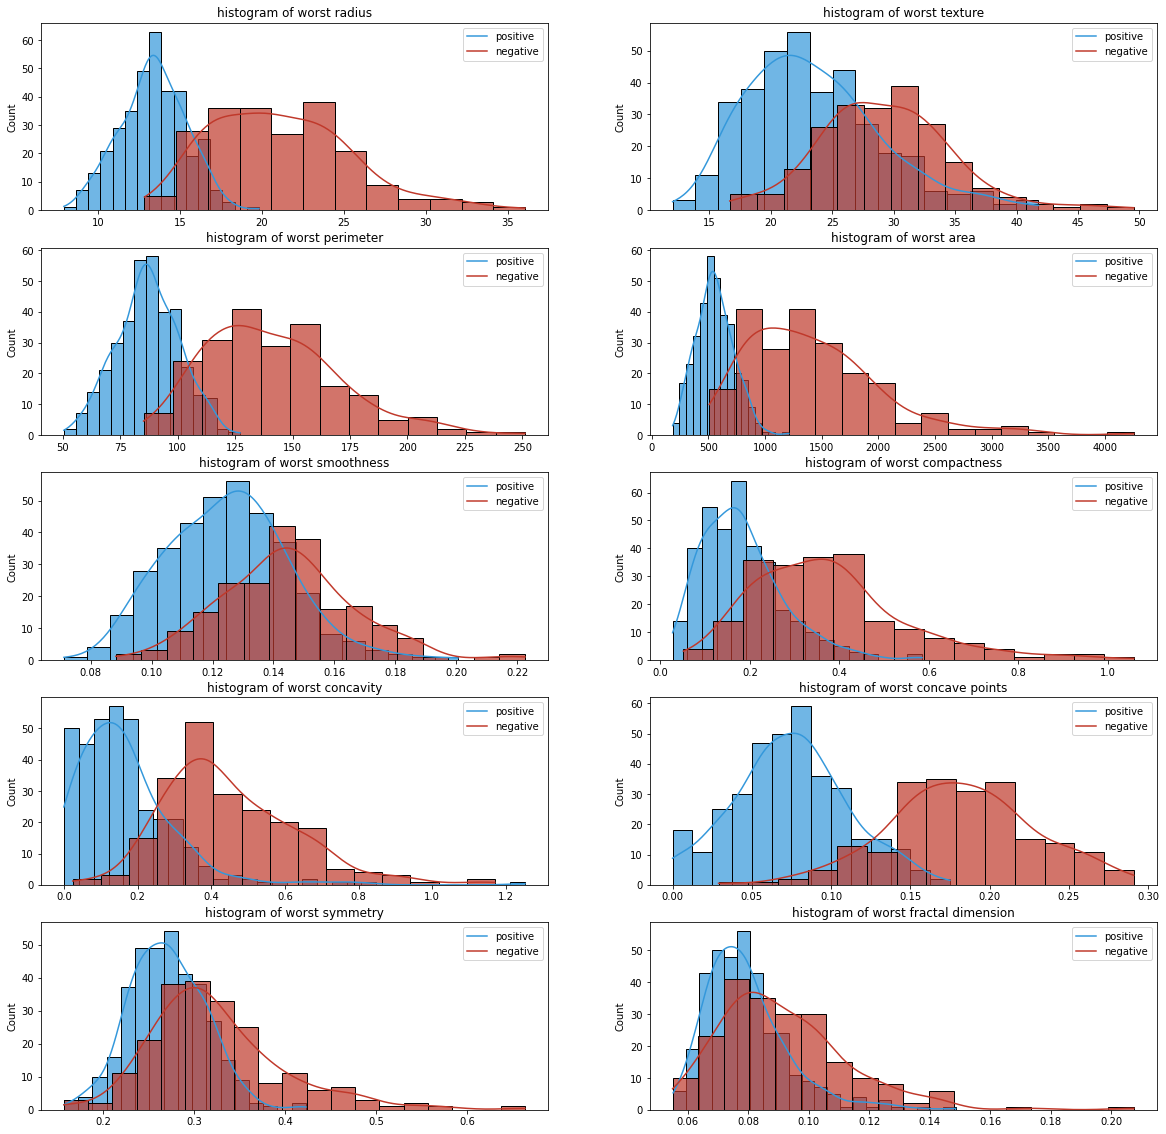

In [19]:
sns_histplot(feature_names[20:], 5, 2)

```
히스토그램을 통해 특정 간격(bin)에 얼마나 많은 데이터 포인트가 나타나는지 확인할 수 있다. 파란색은 양성 클래스를, 
빨간색은 음성 클래스를 나타내고 분포를 통해 어떤 특성이 양성,음성 샘플을 구분하는데 유용할 지 생각해볼 수 있다. 하나의 특성에 양성/음성의 분포가 확실히 구분되는 특성이 유용한데, worst_concave points, worst_radius는 분포가 떨어져있어 구분되어 유용한 특성이라 판단할 수 있고 두 히스토그램이 겹쳐진 특성은 유용하지 못하다고 판단할 수 있다. (30개의 특성 중에 유용한 특성만 골라 차원을 축소할 생각이다)
```

### 2.2.2 Lightgbm 모델을 통해 변수 중요도(Featrue Importances) 시각화 
#### 데이터를 훈련/테스트 데이터로 분리하고 LGBM Classifier로 학습 수행. 

[lightgbm classifier에 대한 자세한 내용](https://www.kaggle.com/prashant111/lightgbm-classifier-in-python) 

```

1. LightGBM model is prone to overfitting on small datasets. So, I pay particular attention to that.
스몰 데이터셋에 과적합되는 경향

2, LightGBM model provides more than 100 parameters to tune for optimum performance. So, I have to decide which hyperparameters to tune,
100개가 넘는 파라미터가 있고 어떤 파라미터를 사용해야할지 신중해야함
```

In [20]:
from sklearn.model_selection import train_test_split

X = breast_cancer_df.drop('label', axis=1)
y = breast_cancer_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [21]:
print(X_train.shape, y_train.shape)

(398, 30) (398,)


In [22]:
print(X_test.shape, y_test.shape)

(171, 30) (171,)


In [23]:
# !pip install lightgbm

In [24]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(boosting_type='gbdt',
                     class_weight=None,
                     colsample_bytree=1.0,
                     importance_type='split',
                     learning_rate=0.1,
                     max_depth=-1,
                     min_child_samples=20,
                     min_child_weight=0.001,
                     min_split_gain=0.0,
                     n_estimators=100,
                     n_jobs=-1,
                     num_leaves=31,
                     objective=None,
                     random_state=None,
                     reg_alpha=0.0,
                     reg_lambda=0.0,
                     silent=True,
                     subsample=1.0,
                     subsample_for_bin=200000,
                     subsample_freq=0)

# 모델 훈련
clf.fit(X_train, y_train)

# 모델 평가
y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9825


In [25]:
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [26]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9825


In [27]:
# 중요 특성 시각화

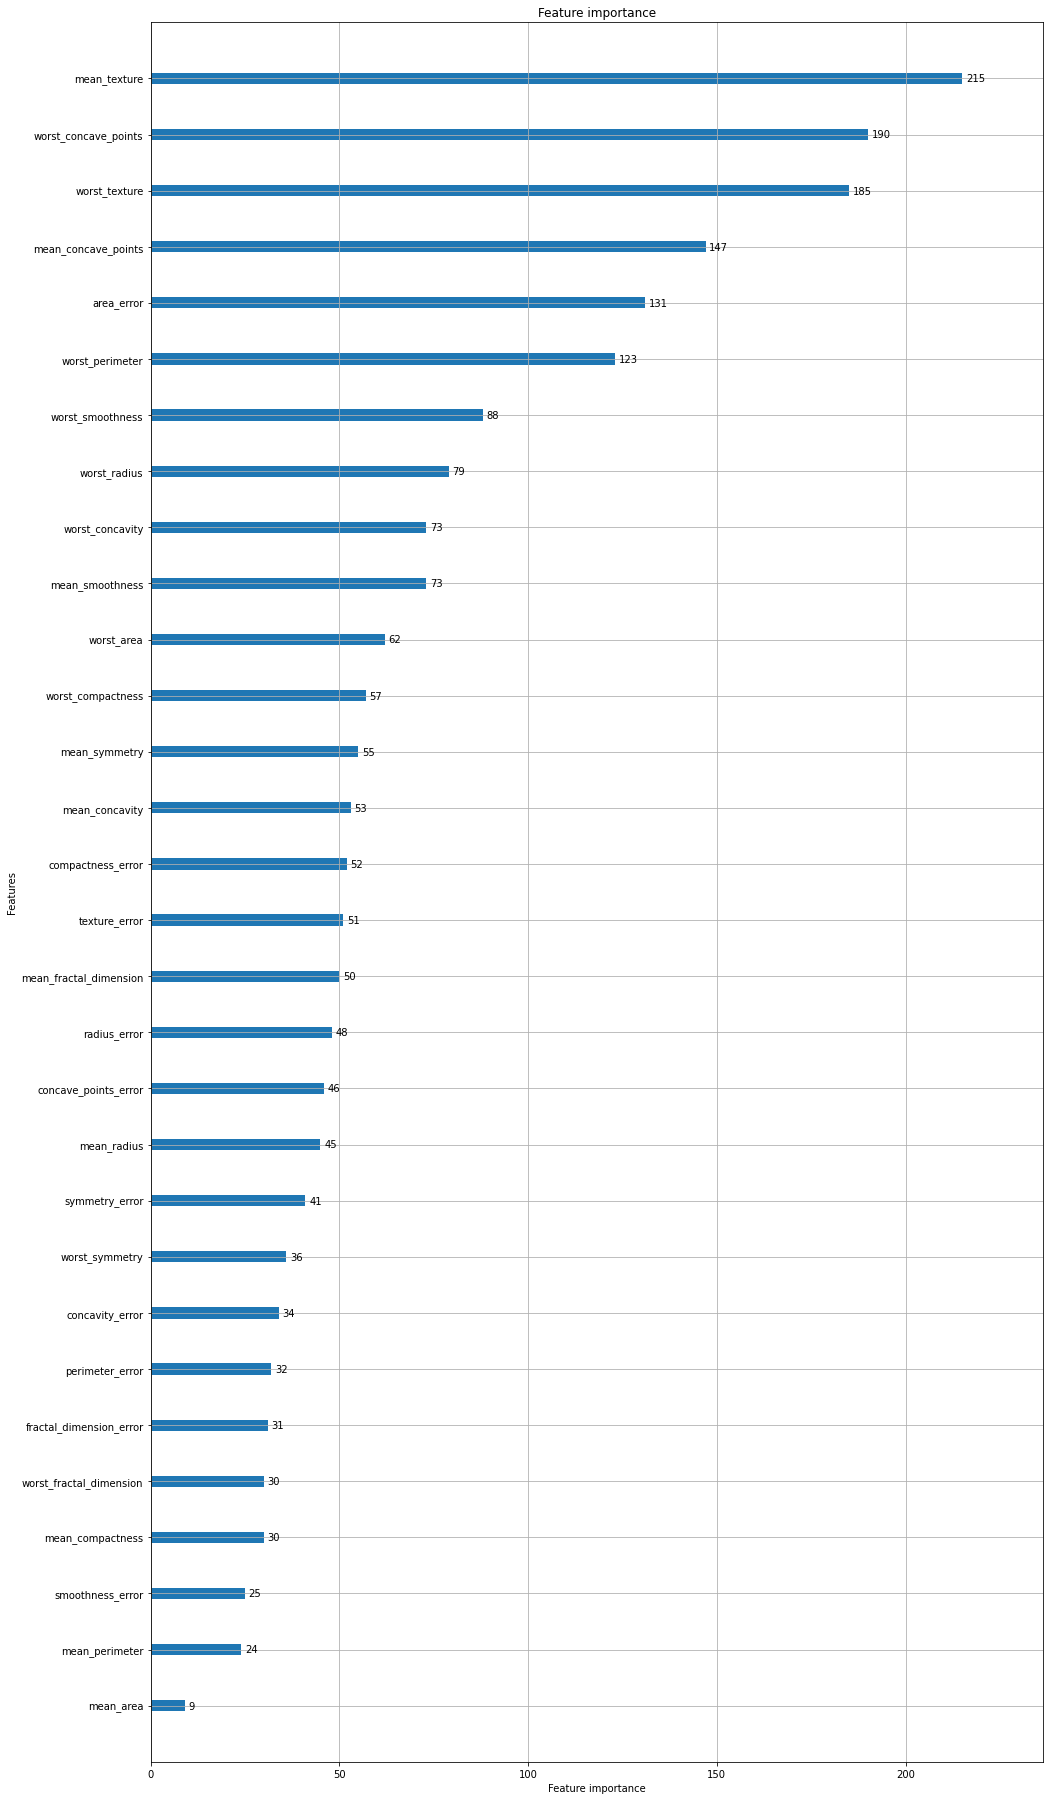

In [28]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))
plt.show()

### 2.2.3 PCA를 통해 중요도가 가장 높은 특징 2개를 시각화 
### 2D

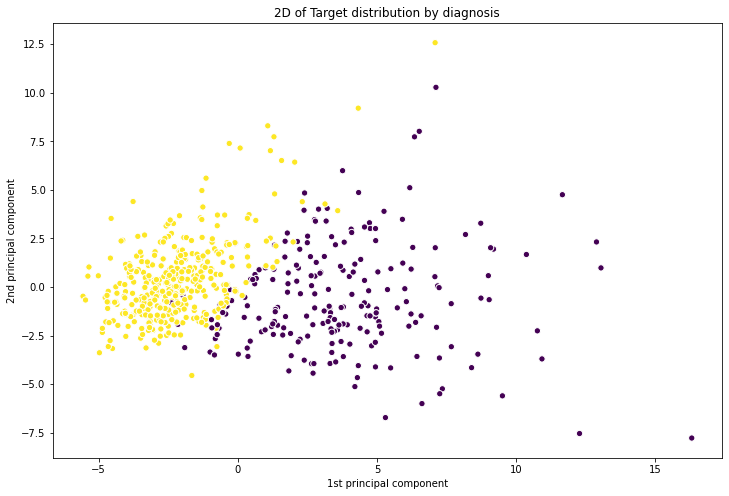

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 스케일링
sc = StandardScaler()
scaled_cancer_df = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

# 2D 시각화
pca2 = PCA(n_components=2)
pca2_data = pca2.fit_transform(scaled_cancer_df)

plt.figure(figsize=(12, 8))
plt.scatter(pca2_data[:,0], pca2_data[:,1], c=y, s=40, edgecolors='white')
plt.title("2D of Target distribution by diagnosis")
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.show()

components_ are mathematically the eigenvectors of the covariance matrix of the centered input matrix. This can be verified by using plain numpy.

In [30]:
print(pca2.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


### 2.2.3 PCA를 통해 중요도가 가장 높은 특징 3개를 시각화 
### 3D

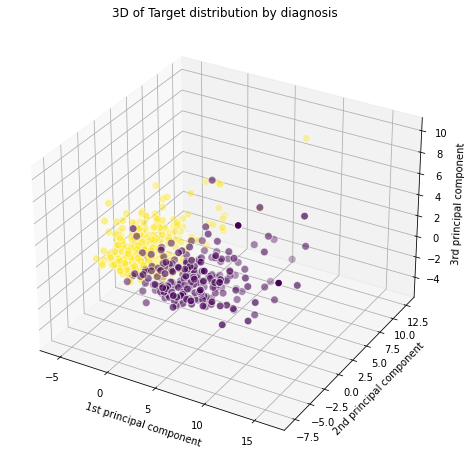

In [31]:
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
pca3_data = pca3.fit_transform(scaled_cancer_df)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(pca3_data[:,0], pca3_data[:,1], pca3_data[:,2], c=y, s=60, edgecolors='white')
ax.set_title('3D of Target distribution by diagnosis')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.set_zlabel('3rd principal component')
plt.show()

In [32]:
print(pca3.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016537 -0.0347675   0.19034877  0.36657548 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443046  0.23271589  0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796412 -0.00825723  0.14188335  0.27533947]
 [-0.00853124  0.06454988 -0.00931422  0.02869951 -0.10429182 -0.07409154
   0.00273379 -0.02556359 -0.04023995 -0.02257418  0.26848139  0.37463367
   0.26664537  0.21600655  0.30883894  0.15477987  0.17646375  0.22465754
   0.28858427  0.21150378 -0.04750699

## 2.4 데이터 불균형
#### 양성 / 음성 클래스 분포가 어떻게 되는가?

>양성(1)과 음성(0)의 6:4정도의 비율을 가지기 때문에 심한 불균형이 아니므로 모델을 평가할 때는 accuracy가
중요하지만 정확도만으로 모델의 예측 성능을 측정하기에는 부족합니다. 암 진단 문제의 경우 False Negative(Type2 에러)를 낮추는 지표(Recall) 성능이 중요합니다

#### 따라서 이번 분석에서는 모델 성능을 Recall을 기준으로 평가합니다.

--------

#### 모델이 정확하게 암환자를 분류할 수 있는지 여부는 아주 중요한데, 
[Type 1 Error]
>건강한 사람을 양성으로 분류하면(False Positve) 추가 검사를 받아야 하므로 환자에서 비용 손실과 불편함을
가져다 줄 수 있습니다.


[Type 2 Error]
>암 환자인 사람을 음성으로 분류하면(False Negative) 제대로 된 검사나 치료를 받지 못하므로 아주 critical한 오류입니다. 
```
암 진단 문제는 거짓 음성을 최대한 피해야 하는 반면 거짓 양성은 비교적 중요도가 낮습니다.
따라서 False Negative가 중요한 영향을 미치는 지표에서 FN값은 낮아야 합니다.
```

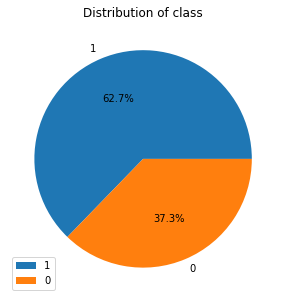

In [33]:
plt.figure(1, figsize=(5,5))
plt.title("Distribution of class")
plt.ylabel("class")
y.value_counts().plot.pie(autopct="%1.1f%%").set_ylabel('')
plt.legend()
plt.show()

In [34]:
# 음성(0) - 212개 , 양성(1) - 357개 
breast_cancer_df['label'].value_counts() 

1    357
0    212
Name: label, dtype: int64

## 2.5 상관관계

변수간 상관관계를 파악하기 위해 sns.heatmap을 이용한다.
특성값을 모두 시각화하기에는 특성의 수가 너무 많기 때문에 0.5 이상의 상관 관계를 가지는 특성들만 표시하였다. 타겟 값을 제외한 특정 두 변수의 상관관계가
0.9 이상일 경우 두 변수 중 하나를 제거해주는 것이 좋다.

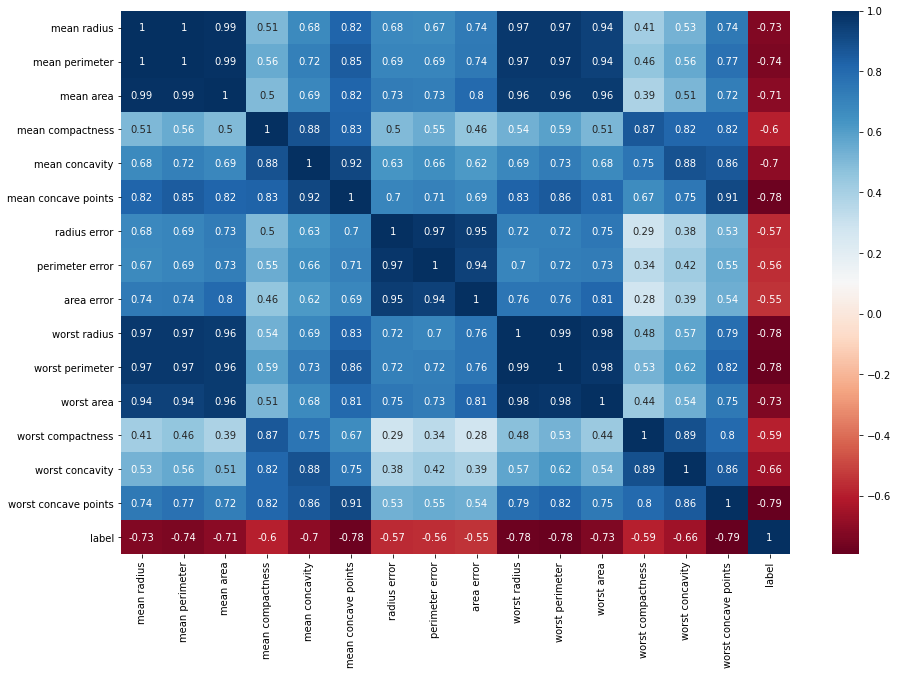

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

breast_cancer_df_cp = breast_cancer_df.copy()
corr_matrix = breast_cancer_df_cp.corr()
filtered_corr_features = corr_matrix.index[abs(corr_matrix["label"])>=0.5]

plt.figure(figsize=(15,10))
g = sns.heatmap(breast_cancer_df_cp[filtered_corr_features].corr(), annot=True, cmap="RdBu")
plt.show()

## 3. 모델 학습
    
    1. Wine Classification과 같은 방법으로 Pipeline을 연결해 모델을 학습합니다. 분석의 목적이 Competition이 아니기 때문에
    모델과 파라미터에 대한 이해 없는 GridSearchCV는 의미가 없다고 생각했습니다. 앞으로 시간을 두고 열심히 공부하겠습니다!
    2. Pipeline에 StandardScaling을 적용합니다.
    3. 2차원 PCA 시각화를 통해 확인했듯이 주성분 2개 차원 공간에서 데이터 포인트들의 클래스가 명확히 구분되어있기 때문에 
    PCA를 Pipeline에 연결해 성능을 테스트합니다.

In [36]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.svm import SVC as svm
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [37]:
models = {
    'DecisionTree': dt(),
    'RandomForest': rf(),
    'SVM': svm(),
    'SGD': sgd(),
    'Logistic Regression': lr()
}

In [38]:
# Decision Tree Pipeline
pipeline_dt = Pipeline([('scaler1', StandardScaler()),
                        ("dt_classifier", dt())]
                        )
# RandomForest Pipeline
pipeline_rf = Pipeline([('scaler2', StandardScaler()),
                        ("rf_classifier", rf())]
                        )
# SVM Pipeline
pipeline_svm = Pipeline([('scaler3', StandardScaler()),
                        ("svm_classifier", svm())]
                        )
# SGD Pipeline
pipeline_sgd = Pipeline([('scaler4', StandardScaler()),
                        ("sgd_classifier", sgd())]
                        )
# Logisitc Regression Pipeline
pipeline_lr = Pipeline([('scaler5', StandardScaler()),
                        ("lr_classifier", lr())]
                        )

In [39]:
pipelines = [
    pipeline_dt,
    pipeline_rf,
    pipeline_svm,
    pipeline_sgd,
    pipeline_lr
]

In [40]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [41]:
model_list = list(models.keys())
test_scores = []

for i, model in enumerate(pipelines):
    score = cross_val_score(model, X_test, y_test, scoring='recall', cv=5)
    score = np.mean(score)
    score = int(round(score, 2) * 100)
    test_scores.append(score)
    print("{} Test Recall: {}%".format(model_list[i], test_scores[i]))

DecisionTree Test Recall: 97%
RandomForest Test Recall: 96%
SVM Test Recall: 98%
SGD Test Recall: 97%
Logistic Regression Test Recall: 99%


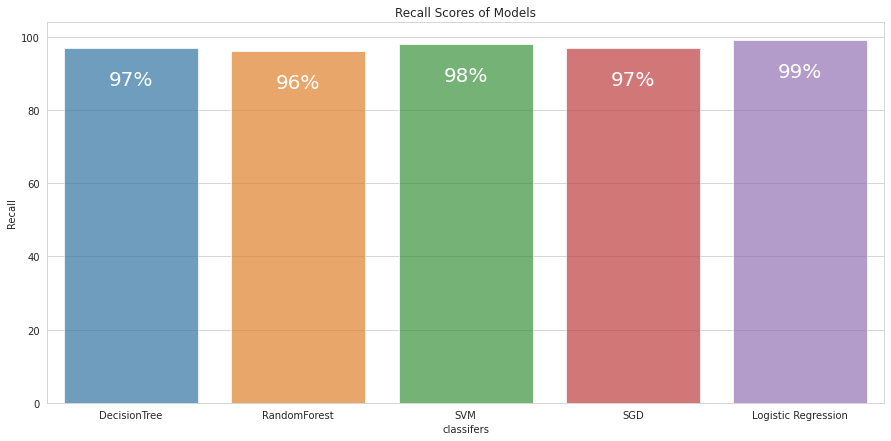

In [42]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
plt.title('Recall Scores of Models')

ax1 = sns.barplot(x=model_list, y=test_scores, alpha=0.7)
for p in ax1.patches:
    ax1.annotate(f'\n{int(p.get_height())}%', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=20)
    
plt.xlabel('classifers')
plt.ylabel('Recall')
plt.show()

In [43]:
# confusion maxtrix를 저장할 리스트
cm_list = [] 

for pipe in pipelines:
    print("---------------------------------------------------------")    
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_list.append(cm)
    print('estimator : {}\n'.format(pipe))
    print("classification Report: \n{}\n".format(classification_report(y_pred, y_test)))

---------------------------------------------------------
estimator : Pipeline(steps=[('scaler1', StandardScaler()),
                ('dt_classifier', DecisionTreeClassifier())])

classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        70
           1       0.91      0.97      0.94       101

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171


---------------------------------------------------------
estimator : Pipeline(steps=[('scaler2', StandardScaler()),
                ('rf_classifier', RandomForestClassifier())])

classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96   

In [44]:
def show_confusion_matrix(cm_list,model_list, i, j):
    idx = 1
    for cm, model in zip(cm_list,model_list):
        if idx <= (i * j):
            plt.figure(figsize=(15,15))
            plt.subplot(i, j, idx)
            cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                     index=['Predict Positive:1', 'Predict Negative:0'])
            sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Greens').set_title('Confusion Matrix of {}'.format(model))
        else:
            break
    plt.show()

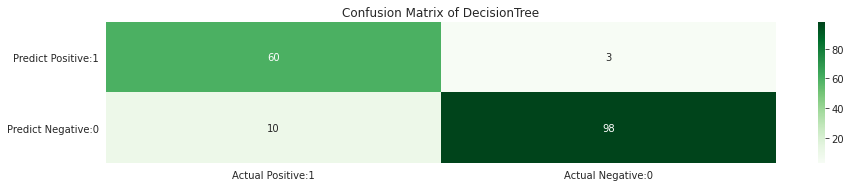

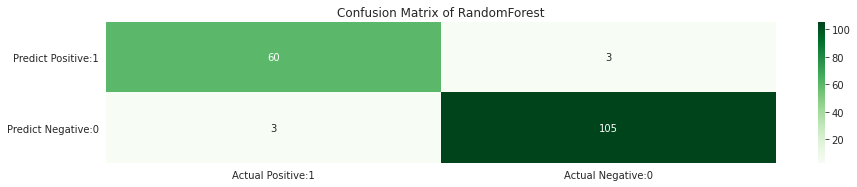

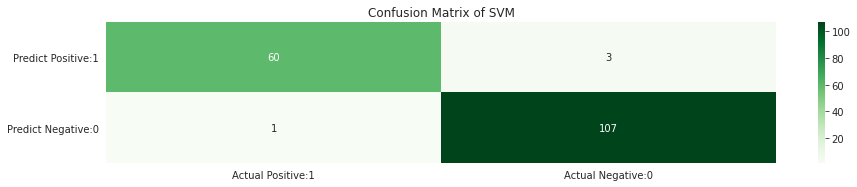

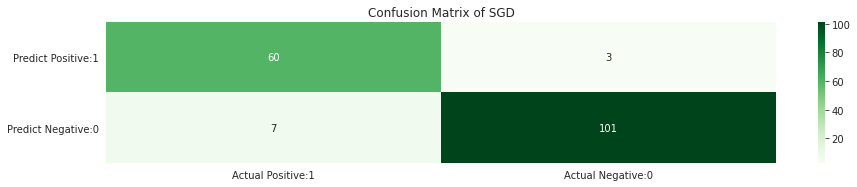

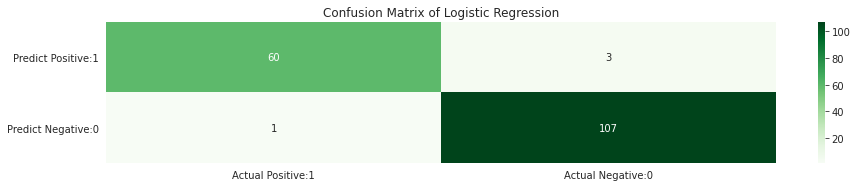

In [45]:
show_confusion_matrix(cm_list,model_list, 5, 1)

In [46]:
# Decision Tree Pipeline
pipeline_dt_with_pca = Pipeline([('scaler1', StandardScaler()),
                        ("pca1", PCA(n_components=2)),
                        ("dt_classifier", dt())]
                        )
# RandomForest Pipeline
pipeline_rf_with_pca = Pipeline([('scaler2', StandardScaler()),
                        ("pca2", PCA(n_components=2)),
                        ("rf_classifier", rf())]
                        )
# SVM Pipeline
pipeline_svm_with_pca = Pipeline([('scaler3', StandardScaler()),
                        ("pca3", PCA(n_components=2)),
                        ("svm_classifier", svm())]
                        )
# SGD Pipeline
pipeline_sgd_with_pca = Pipeline([('scaler4', StandardScaler()),
                        ("pca4", PCA(n_components=2)),
                        ("sgd_classifier", sgd())]
                        )
# Logisitc Regression Pipeline
pipeline_lr_with_pca = Pipeline([('scaler5', StandardScaler()),
                        ("pca5", PCA(n_components=2)),
                        ("lr_classifier", lr())]
                        )

In [47]:
pipelines_with_pca = [
    pipeline_dt_with_pca,
    pipeline_rf_with_pca,
    pipeline_svm_with_pca,
    pipeline_sgd_with_pca,
    pipeline_lr_with_pca
]

In [48]:
for pipe in pipelines_with_pca:
    pipe.fit(X_train, y_train)

In [49]:
model_list = list(models.keys())
new_test_scores = []

for i, model in enumerate(pipelines_with_pca):
    score = cross_val_score(model, X_test, y_test, scoring='recall', cv=5)
    score = np.mean(score)
    score = int(round(score, 2) * 100)
    new_test_scores.append(score)
    print("{} Test Recall: {}%".format(model_list[i], new_test_scores[i]))

DecisionTree Test Recall: 94%
RandomForest Test Recall: 95%
SVM Test Recall: 95%
SGD Test Recall: 96%
Logistic Regression Test Recall: 97%


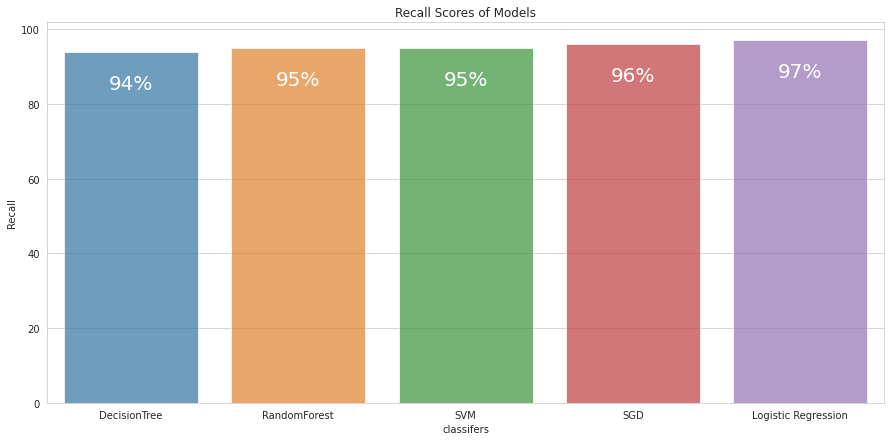

In [50]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
plt.title('Recall Scores of Models')

ax1 = sns.barplot(x=model_list, y=new_test_scores, alpha=0.7)
for p in ax1.patches:
    ax1.annotate(f'\n{int(p.get_height())}%', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=20)
    
plt.xlabel('classifers')
plt.ylabel('Recall')
plt.show()

In [51]:
new_cm_list = []

for pipe in pipelines_with_pca:
    print("---------------------------------------------------------")    
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_pred, y_test)
    new_cm_list.append(cm)
    print('estimator : {}\n'.format(pipe))
    print("classification Report: \n{}\n".format(classification_report(y_pred, y_test)))

---------------------------------------------------------
estimator : Pipeline(steps=[('scaler1', StandardScaler()), ('pca1', PCA(n_components=2)),
                ('dt_classifier', DecisionTreeClassifier())])

classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        72
           1       0.87      0.95      0.91        99

    accuracy                           0.89       171
   macro avg       0.90      0.88      0.88       171
weighted avg       0.89      0.89      0.89       171


---------------------------------------------------------
estimator : Pipeline(steps=[('scaler2', StandardScaler()), ('pca2', PCA(n_components=2)),
                ('rf_classifier', RandomForestClassifier())])

classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        64
           1       0.93      0.93      0.93       107

    accuracy                          

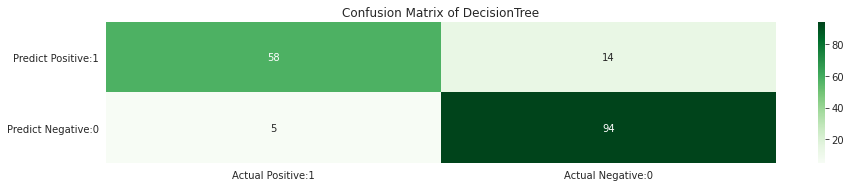

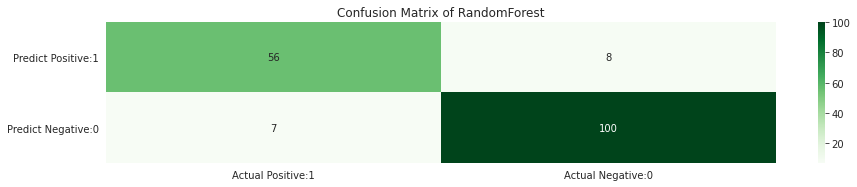

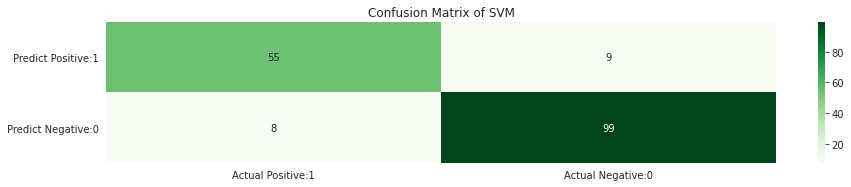

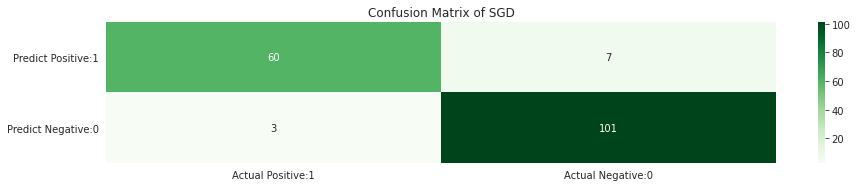

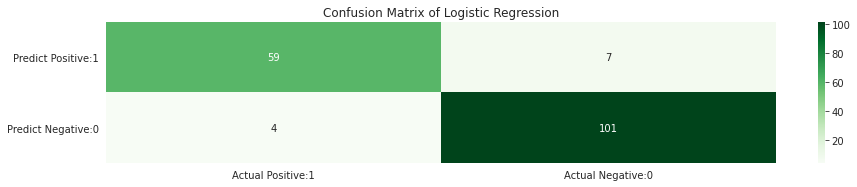

In [52]:
show_confusion_matrix(new_cm_list,model_list, 5, 1)

## 4. 모델 평가

2.4에서 언급한 것 처럼 모델의 성능 지표는 accuracy, recall, precision, f1-score
이외에도 다양합니다. 주어진 문제의 경우 암 진단 결과를 예측하는 문제로 

In [53]:
results = {
    'Recall Scores of Pipeline_1' : test_scores,
    'Recall Scores of Pipeline_2' : new_test_scores
}

In [54]:
results_df = pd.DataFrame(results, index=model_list)
results_df

,Recall Scores of Pipeline_1,Recall Scores of Pipeline_2
DecisionTree,97,94
RandomForest,96,95
SVM,98,95
SGD,97,96
Logistic Regression,99,97
